# Import Libraries and Tools

In [8]:
# !pip install fcmeans
# !pip install yellowbrick

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import fcmeans

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Load Dataset

In [10]:
path_dataset = './data/dataset_kuisioner_modelling.csv'

df = pd.read_csv(path_dataset)

In [11]:
df.head()

,penilaian_rendah_matkul_matematika_binggris_1,pendidikan_orang_tua_tingkat_bawah,nilai_matkul_bahasa_inggris_rendah_pendidikan_ibu_tinggi,estimasi_waktu_perjalanan_ke_kampus,jumlah_saudara,suka_lomba_durasi_tinggi_bekerja_minim_akses_sosial_media,penghasilan_orang_tua_rendah_pendidikan_ayah_dominan_ibu_tahun_lahir_awal_sedikit_saudara,penghasilan_orang_tua_rendah_pendidikan_ibu_tinggi,tinggi_akses_sosial_media_suka_lomba,kurang_suka_lomba_durasi_tinggi_bekerja,...,perempuan_tidak_mengikuti_organisasi_dan_ukm_tanpa_role_model,perempuan_jawa_barat_lumayan_mengikuti_lomba_pembelajaran_luring_aural,perempuan_matkul_pembelajaran_mesin_ilmu_komputer_role_model_ibu_sma_swasta_aktif_lomba_dan_bekerja,akses_belajar_daring_tipe_belajar_reading_lumayan_mengikuti_lomba,sering_mengikuti_lomba_pendaftaran_kampus_seleksi_rapot,matkul_sains_data_geofisika_tipe belajar_visual_sma_swasta,sosial_media_twitter_tiktok_akses_belajar_daring,tidak_mengikuti_organisasi_tipe_belajar_visual_lumayan_mengikuti_lomba,role_model_ayah,kelas_sistem_informasi_manajemen_pendaftaran_kampus_ujian_tes
0,0.338425,1.433548,-1.091689,-1.265994,-2.561452,2.086908,-2.040221,-2.099394,1.591323,0.823435,...,0.053171,0.009305,-0.745482,-0.198555,1.486734,-0.729581,0.301963,0.543789,0.078626,0.164537
1,1.189510,1.644142,0.343428,0.348584,-2.039925,0.785242,1.364350,-0.581736,0.060806,1.867268,...,-0.042175,-0.274747,0.100731,-0.844874,-0.221227,0.867243,-0.530091,0.085972,0.083620,0.052893
2,-2.023829,-2.506408,-0.707621,2.374296,-2.335253,-0.245535,-0.048997,0.818981,-0.859689,0.772567,...,0.347946,-0.319269,-0.914723,0.563480,-0.002283,0.742933,-0.242106,-0.719851,-0.151234,0.300561
3,0.008412,-3.644020,-1.455362,0.689289,0.804518,-1.372682,-0.932659,-0.068411,0.435030,0.843686,...,-0.649986,0.029678,-0.977152,-0.270192,0.021613,-1.034684,0.250341,-0.559344,-0.250310,-0.050635
4,3.266050,0.661110,2.264773,-0.742005,-0.500082,0.485455,0.020310,-0.588556,-0.295993,0.943532,...,-1.343327,0.858119,-0.608300,-0.536641,-0.238655,0.573902,-0.236178,0.038433,0.149559,-0.764643


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 24 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   penilaian_rendah_matkul_matematika_binggris_1                                                        140 non-null    float64
 1   pendidikan_orang_tua_tingkat_bawah                                                                   140 non-null    float64
 2   nilai_matkul_bahasa_inggris_rendah_pendidikan_ibu_tinggi                                             140 non-null    float64
 3   estimasi_waktu_perjalanan_ke_kampus                                                                  140 non-null    float64
 4   jumlah_saudara                                                                                       140 non-n

In [13]:
df.describe()

,penilaian_rendah_matkul_matematika_binggris_1,pendidikan_orang_tua_tingkat_bawah,nilai_matkul_bahasa_inggris_rendah_pendidikan_ibu_tinggi,estimasi_waktu_perjalanan_ke_kampus,jumlah_saudara,suka_lomba_durasi_tinggi_bekerja_minim_akses_sosial_media,penghasilan_orang_tua_rendah_pendidikan_ayah_dominan_ibu_tahun_lahir_awal_sedikit_saudara,penghasilan_orang_tua_rendah_pendidikan_ibu_tinggi,tinggi_akses_sosial_media_suka_lomba,kurang_suka_lomba_durasi_tinggi_bekerja,...,perempuan_tidak_mengikuti_organisasi_dan_ukm_tanpa_role_model,perempuan_jawa_barat_lumayan_mengikuti_lomba_pembelajaran_luring_aural,perempuan_matkul_pembelajaran_mesin_ilmu_komputer_role_model_ibu_sma_swasta_aktif_lomba_dan_bekerja,akses_belajar_daring_tipe_belajar_reading_lumayan_mengikuti_lomba,sering_mengikuti_lomba_pendaftaran_kampus_seleksi_rapot,matkul_sains_data_geofisika_tipe belajar_visual_sma_swasta,sosial_media_twitter_tiktok_akses_belajar_daring,tidak_mengikuti_organisasi_tipe_belajar_visual_lumayan_mengikuti_lomba,role_model_ayah,kelas_sistem_informasi_manajemen_pendaftaran_kampus_ujian_tes
count,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,...,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02,140.000000,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02
mean,1.065814e-15,-8.628019e-16,-1.268826e-16,1.776357e-16,4.853261e-16,-4.091965e-16,4.900842e-16,4.187127e-16,2.410770e-16,-1.776357e-16,...,-4.440892e-17,3.806479e-17,-5.075305e-17,-1.205385e-16,-2.537653e-16,0.000000,6.661338e-17,1.383814e-16,-1.927030e-16,8.881784e-17
std,2.420709e+00,2.062826e+00,1.537590e+00,1.453998e+00,1.372590e+00,1.233142e+00,1.127011e+00,1.097832e+00,1.063083e+00,9.767984e-01,...,7.150494e-01,6.754710e-01,6.600255e-01,6.382788e-01,6.043212e-01,0.579972,5.661533e-01,5.582089e-01,5.505015e-01,5.477977e-01
min,-3.609595e+00,-3.644020e+00,-2.808981e+00,-3.489257e+00,-2.648417e+00,-2.258525e+00,-2.872788e+00,-3.006638e+00,-2.607702e+00,-2.523206e+00,...,-1.633114e+00,-1.750120e+00,-1.387725e+00,-1.516271e+00,-1.405994e+00,-1.207271,-1.532395e+00,-1.356012e+00,-1.348474e+00,-1.386544e+00
25%,-2.089224e+00,-1.575498e+00,-9.927536e-01,-1.053751e+00,-1.014812e+00,-8.689908e-01,-7.844736e-01,-6.889425e-01,-7.132954e-01,-7.562167e-01,...,-4.863907e-01,-4.429567e-01,-5.251816e-01,-4.817337e-01,-3.803463e-01,-0.403725,-3.786059e-01,-3.941048e-01,-3.834552e-01,-3.196512e-01
50%,-2.770927e-01,1.731386e-01,-3.539648e-02,-1.599417e-01,-1.544943e-01,-1.820741e-01,7.545253e-02,5.204974e-02,-4.916123e-02,4.262701e-02,...,-5.388828e-03,-1.390855e-02,1.124596e-02,1.198452e-02,-1.686990e-02,0.033219,-2.876409e-02,7.243533e-02,4.361310e-02,2.274032e-02
75%,2.233782e+00,1.606560e+00,6.960398e-01,8.529036e-01,9.155949e-01,8.879682e-01,7.513183e-01,6.406816e-01,7.402879e-01,6.944127e-01,...,4.708488e-01,3.830881e-01,5.054168e-01,3.868605e-01,3.598817e-01,0.439019,3.195349e-01,3.977340e-01,4.055860e-01,3.192853e-01
max,4.944831e+00,5.506486e+00,5.416320e+00,4.464780e+00,3.514159e+00,3.920575e+00,2.879107e+00,3.404288e+00,3.502317e+00,2.907553e+00,...,1.915422e+00,1.988032e+00,1.688944e+00,1.884862e+00,2.042136e+00,1.400055,1.709923e+00,1.409966e+00,1.446014e+00,1.644437e+00


# Create Clustering Model

## K-Means Clustering

references: <br>
https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/ <br>
https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1 <br>
https://stackabuse.com/k-means-elbow-method-and-silhouette-analysis-with-yellowbrick-and-scikit-learn/ <br>

### Determine Total Cluster using Elbow Plot and Silhouette Analysis

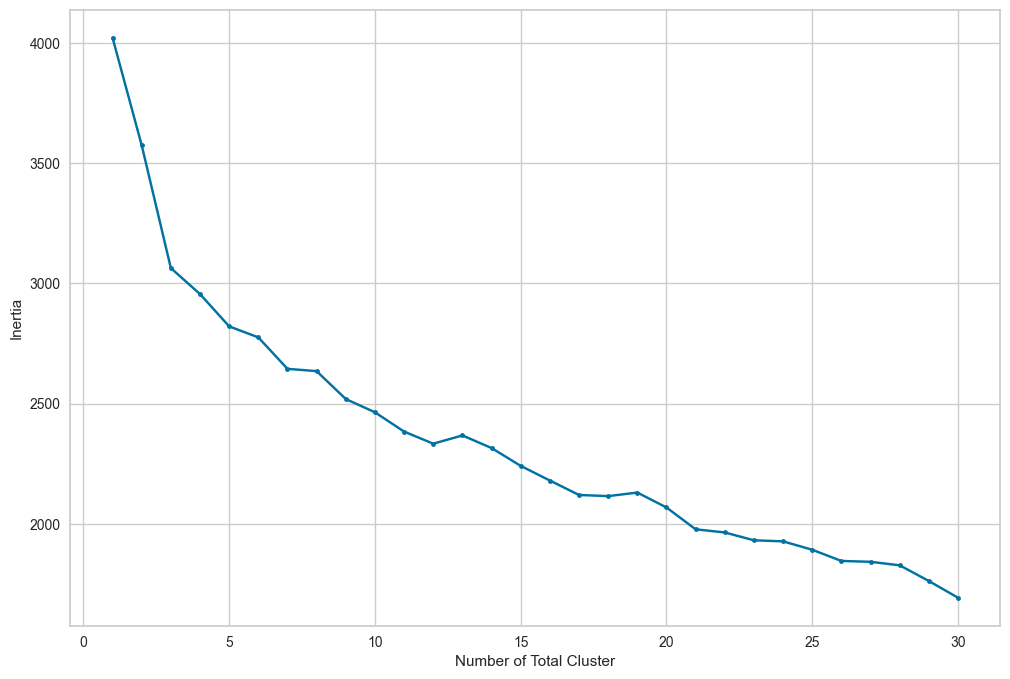

In [55]:
inertia_values = []
max_cluster = 30

for cluster in range(max_cluster):
#     print(cluster)
#     kmeans = KMeans(n_clusters=cluster+1, n_init='auto')
    kmeans = KMeans(n_clusters=cluster+1, init='k-means++', n_init=1)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=[12, 8])

plt.plot(np.arange(1, max_cluster+1, step=1), inertia_values, marker='.', linestyle='-')

plt.xlabel('Number of Total Cluster')
plt.ylabel('Inertia')

plt.show()

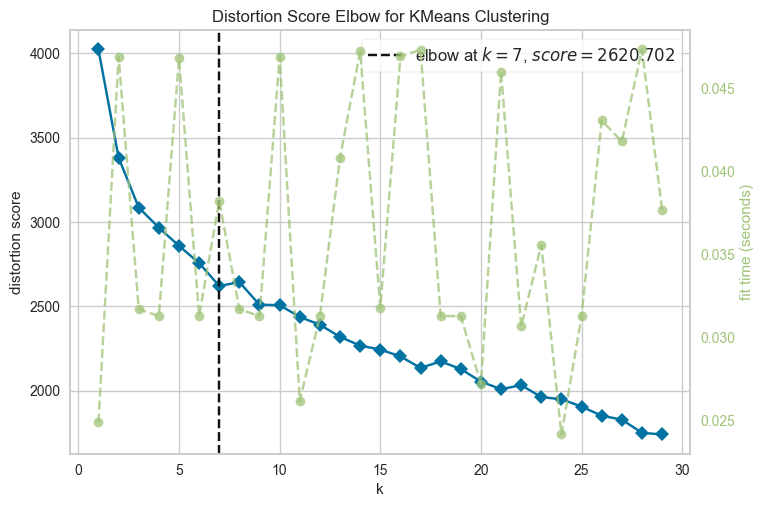

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
elb_visualizer = KElbowVisualizer(KMeans(n_clusters=cluster+1, n_init='auto'), k=(1, max_cluster))
elb_visualizer.fit(df)    
elb_visualizer.show()

## Fuzzy C-Means Clustering